In [1]:
# Exploratory Data Analysis (EDA) for eCommerce Transactions Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the datasets
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

In [5]:
# Basic EDA: Summaries and Statistics
print(customers_df.info())
print(products_df.info())
print(transactions_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

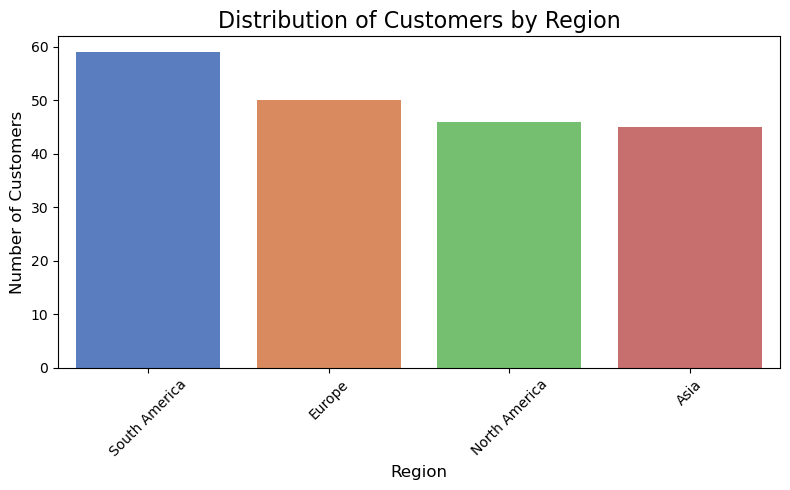

In [23]:
# Insight 1: Customers by Region
plt.figure(figsize=(8, 5))
region_counts = customers_df['Region'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values, hue=region_counts.index, palette='muted', legend=False)
plt.title('Distribution of Customers by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

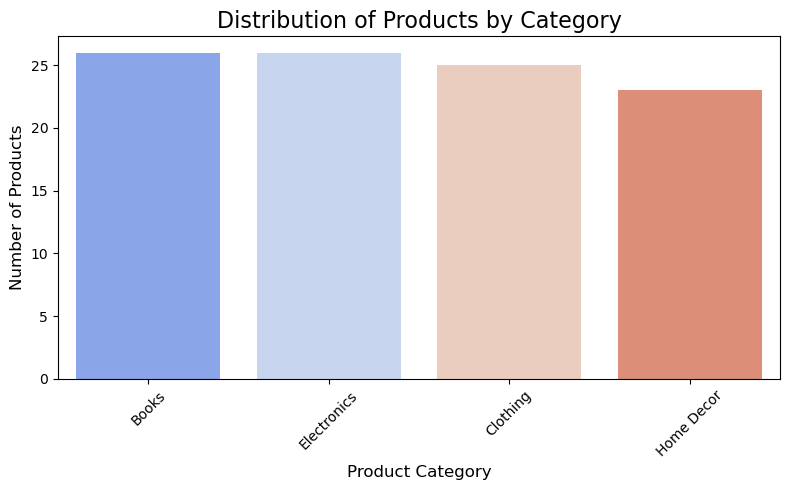

In [29]:
# Insight 2: Product Categories
plt.figure(figsize=(8, 5))
category_counts = products_df['Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values, hue=category_counts.index, palette='coolwarm', legend=False)
plt.title('Distribution of Products by Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

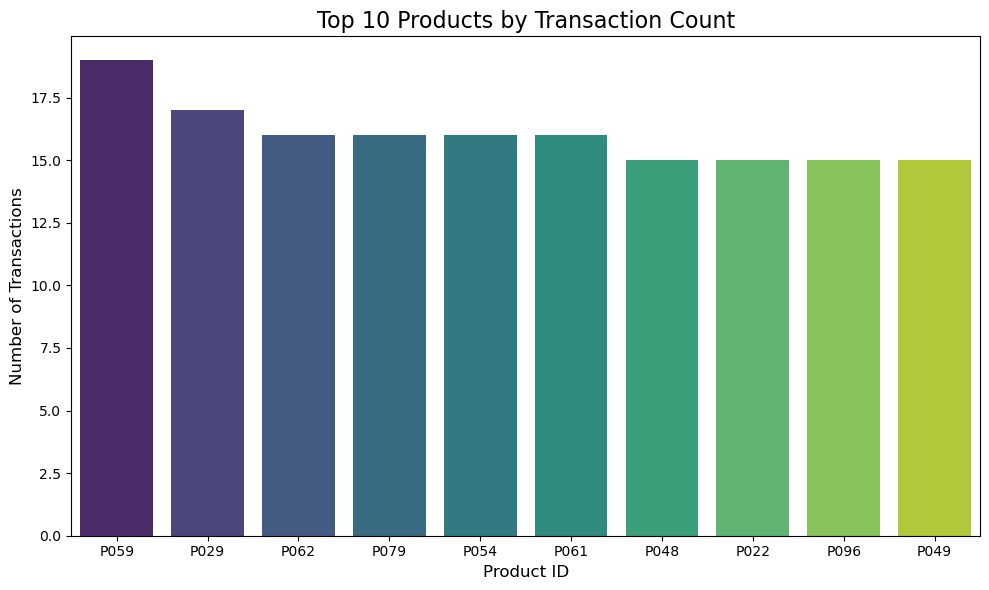

In [31]:
# Insight 3: Top 10 Products by Transaction Count
top_products = transactions_df['ProductID'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values, hue=top_products.index, palette='viridis', legend=False)
plt.title('Top 10 Products by Transaction Count', fontsize=16)
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.tight_layout()
plt.show()

In [33]:
# Insight 4: Average Transaction Value
avg_transaction_value = transactions_df['TotalValue'].mean()
print(f"The average transaction value is ${avg_transaction_value:.2f}.")

The average transaction value is $690.00.


In [35]:
# Insight 5: Popular Regions for Transactions
region_sales = transactions_df.merge(customers_df, on='CustomerID').groupby('Region')['TotalValue'].sum()
print(region_sales.sort_values(ascending=False))

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64
